In [1]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys


In [2]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [3]:
#Set Fonts/Plot Style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [4]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 176)  #use file number
df.columns

DEPRECATION WARNING: DataObject.getInfo()
DEPRECATION WARNING: DataObject.getData()


Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [5]:
#field dependent measurement from 0-5 T for sample 4(100)
#field = np.append((0,0.1),np.arange(0.5,5.5,.5))  
#Erscan = np.arange(39,63,2)    #0.1 T 373
#Prscan = np.arange(40,64,2)  #M5 edge
#Prscan = np.arange(374,379,1)  #M4 edge

#field dependent measurement from 0-5 T for sample 4(100) Pr M4 edge
field = np.array([0.1,1,2,3,4])  
Erscan = np.array([41,45,49,53,57])   #0.1 T 373
Prscan = np.arange(374,379,1)  #M4 edge

#field dependent meas from 5 T to 0T for sample 4 (100)
#field1 = np.arange(4.5,0.4,-.5)
#field2=np.array(0.1)
#field=np.append(field1,field2)
#Erscan = np.arange(63,83,2)
#Prscan = np.arange(64,84,2)

#field dependent meas (combined) from 0 to 5 T and 5 T to 0T for sample 4 (100)
#field0 = np.append((0,.1),np.arange(0.5,5.5,.5))
#field1 = np.arange(4.5,0.4,-.5)
#field2=np.array(0.1)
#field3=np.append(field1,field2)
#field=np.append(field0,field3)
#Erscan = np.arange(39,83,2)
#Prscan = np.arange(40,84,2)


#field dependent measurement from 0-5 T for sample 4(110)
#field =  np.arange(0,5,.5)  
#Erscan = np.arange(157,177,2)
#Prscan = np.arange(158,178,2)

#field dependent measurement from 0- (-5)T  for sample 4(110)
#field =  np.array([0,-1,-2,-2.5,-3,-4,-5])  
#Erscan = np.arange(237,251,2)
#Prscan = np.arange(238,252,2) 
 
#field dependent measurement from -5 -1T for sample 4(110)
#field =  np.array([-5, -4,-3,-2.5,-2,-1])  
#Erscan = np.arange(249,261,2)
#Prscan = np.arange(250,262,2)

#field dependent measurement from 0- (-5)T and -5 to 0 T for sample 4(110)
#field =  np.array([0,-1,-2,-2.5,-3,-4,-5, -4, -3, -2.5, -2, -1])  
#Erscan = np.arange(237,261,2)
#Prscan = np.arange(238,262,2) 

#field dependent measurement from 0-5 for sample 4(111)
#field =  np.array([0.1,0.5,1,1.5,2,3,4,5])  
#Erscan = np.array([351,353,313,355,357,317,319,324])
#Prscan = np.array([352,354,314,356,318,358,320,325])


Erdata = []
Prdata = []
for i in range(len(field)):
    Erdata.append(XMCD(sf,Erscan[i]))
    Prdata.append(XMCD(sf,Prscan[i]))
Erdata = np.array(Erdata)
Prdata = np.array(Prdata)


In [6]:
field

array([0.1, 1. , 2. , 3. , 4. ])

In [7]:
Erdata.shape

(5, 8, 176)

In [8]:
Er_energy = Erdata[:,0,:]
Er_TEYsum = Erdata[:,3,:]
Er_TEYxmcd = Erdata[:,4,:]
Er_TFYsum = Erdata[:,5,:]
Er_TFYxmcd = Erdata[:,6,:]
Pr_energy = Prdata[:,0,:]
Pr_TEYsum = Prdata[:,3,:]
Pr_TEYxmcd = Prdata[:,4,:]
Pr_TFYsum = Prdata[:,5,:]
Pr_TFYxmcd = Prdata[:,6,:]

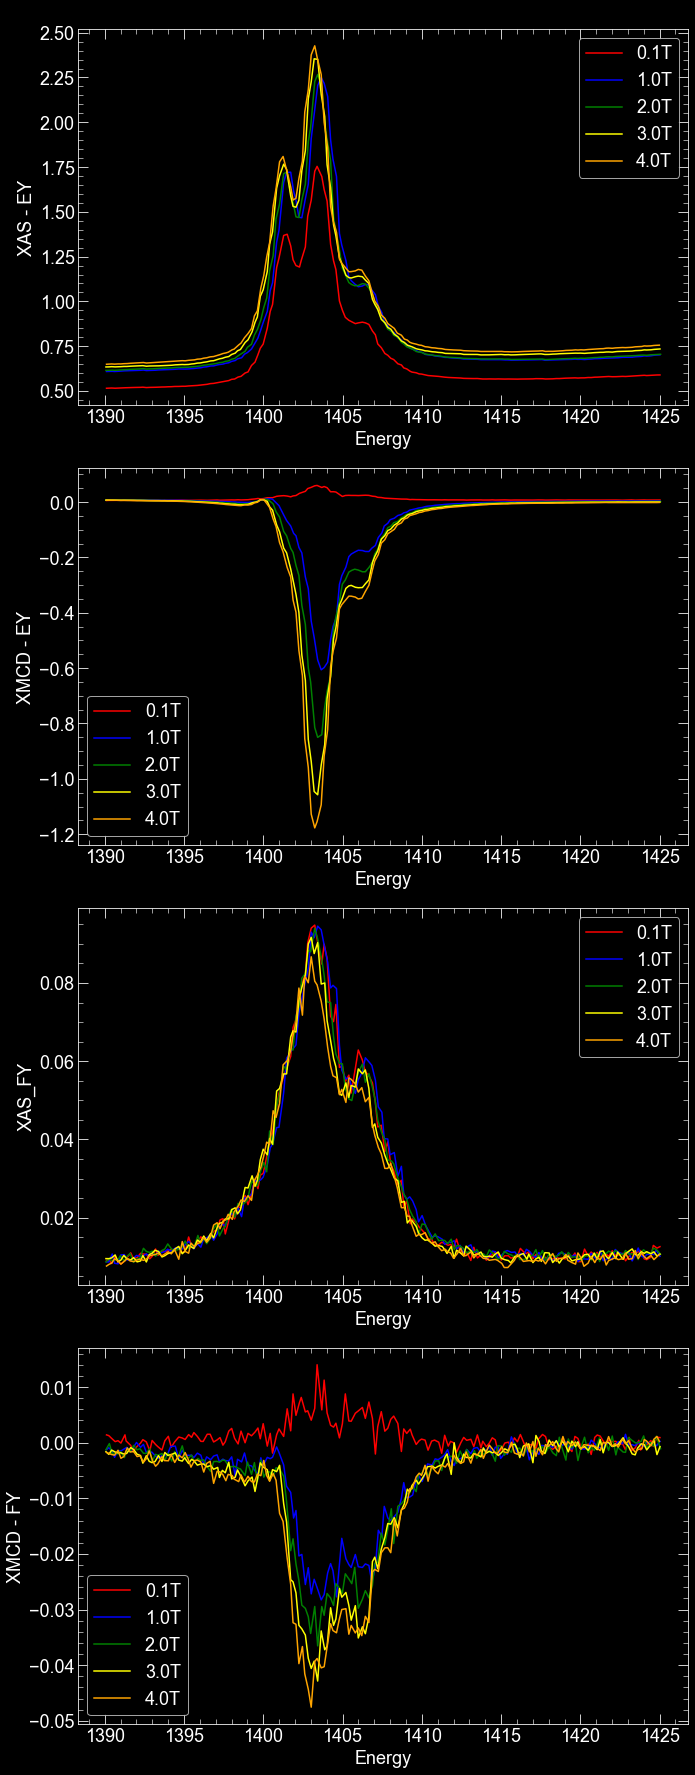

In [9]:
col = ["red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna',"red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna']
#col = ["red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna']
colors=[]
for i in range(len(field)):
    colors.append(col[i])
    
#colors = ["red", "blue" , "green", 'yellow', 'orange']
plt.style.use('dark_background')


fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(4,1,1)
ax.set_title('Er',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')

for i in range(len(field)):
    ax.plot(Er_energy[i,:],Er_TEYsum[i,:], color=colors[i],label=str(field[i])+'T')
ax.legend()

ax = fig.add_subplot(4,1,2)
ax.set_ylabel('XMCD - EY')
ax.set_xlabel('Energy')

for i in range(len(field)):
    ax.plot(Er_energy[i,:],Er_TEYxmcd[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()

ax = fig.add_subplot(4,1,3)
ax.set_ylabel('XAS_FY')
ax.set_xlabel('Energy')

for i in range(len(field)):
    ax.plot(Er_energy[i,:],Er_TFYsum[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()

ax = fig.add_subplot(4,1,4)
ax.set_ylabel('XMCD - FY')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Er_energy[i,:],Er_TFYxmcd[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()
plt.tight_layout()



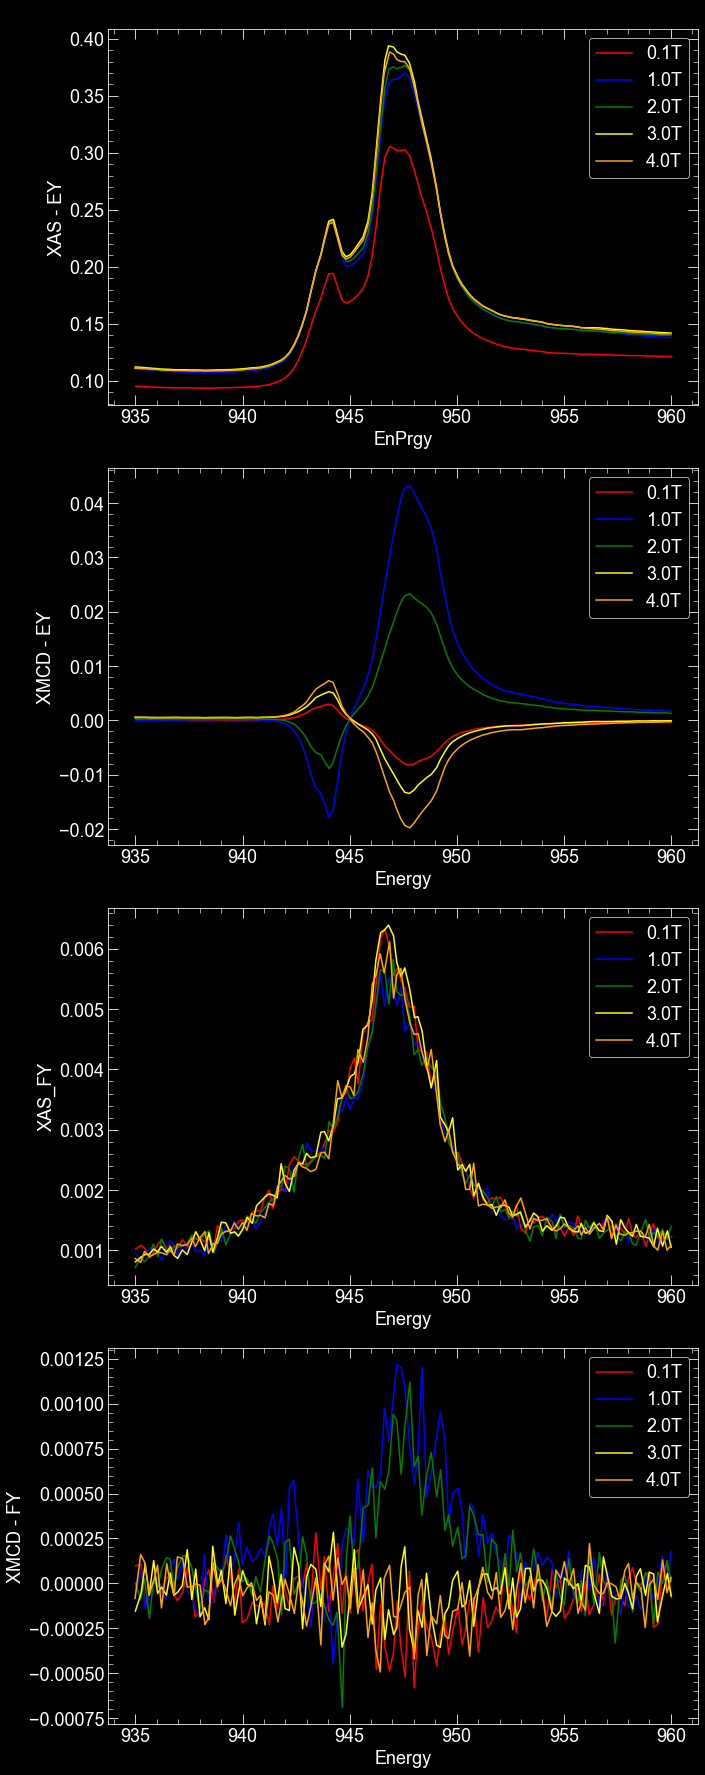

In [10]:


fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(4,1,1)
ax.set_title('Pr',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('EnPrgy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],Pr_TEYsum[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()

ax = fig.add_subplot(4,1,2)
ax.set_ylabel('XMCD - EY')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],Pr_TEYxmcd[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()
ax = fig.add_subplot(4,1,3)
ax.set_ylabel('XAS_FY')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],Pr_TFYsum[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()
ax = fig.add_subplot(4,1,4)
ax.set_ylabel('XMCD - FY')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],Pr_TFYxmcd[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()
plt.tight_layout()

In [11]:
ScEr_TEYsum = np.zeros(Er_TEYsum.shape)
ScEr_TEYxmcd = np.zeros(Er_TEYsum.shape)
for i in range(len(field)):
    ScEr_TEYsum[i,:], ScEr_TEYxmcd[i,:] = norm_xmcd(Er_TEYsum[i,:],Er_TEYxmcd[i,:])
    
ScEr_TFYsum = np.zeros(Er_TEYsum.shape)
ScEr_TFYxmcd = np.zeros(Er_TEYsum.shape)
for i in range(len(field)):
    ScEr_TFYsum[i,:], ScEr_TFYxmcd[i,:] = norm_xmcd(Er_TFYsum[i,:],Er_TFYxmcd[i,:])

    
ScPr_TEYsum = np.zeros(Pr_TEYsum.shape)
ScPr_TEYxmcd = np.zeros(Pr_TEYsum.shape)
for i in range(len(field)):
    ScPr_TEYsum[i,:], ScPr_TEYxmcd[i,:] = norm_xmcd(Pr_TEYsum[i,:],Pr_TEYxmcd[i,:])
    
ScPr_TFYsum = np.zeros(Pr_TEYsum.shape)
ScPr_TFYxmcd = np.zeros(Pr_TEYsum.shape)
for i in range(len(field)):
    ScPr_TFYsum[i,:], ScPr_TFYxmcd[i,:] = norm_xmcd(Pr_TFYsum[i,:],Pr_TFYxmcd[i,:])
    
#Correct XMCD zero

for i in range(len(field)):
    ScEr_TEYxmcd[i,:] -=  np.average(ScEr_TEYxmcd[i,-5:-1])
    ScPr_TEYxmcd[i,:] -=  np.average(ScPr_TEYxmcd[i,-5:-1])

Normalization:  1.238972942563
Normalization:  1.641998367896
Normalization:  1.6517781726299998
Normalization:  1.7205950052640002
Normalization:  1.7779819270330002
Normalization:  0.08660232433934
Normalization:  0.08629702291694
Normalization:  0.08535981526551
Normalization:  0.0832560152488
Normalization:  0.07941749077195
Normalization:  0.21185057669989998
Normalization:  0.26272610769099997
Normalization:  0.268122117686
Normalization:  0.28458410085200003
Normalization:  0.27984103877
Normalization:  0.00545092404333
Normalization:  0.0047449727354890005
Normalization:  0.0051050454249890005
Normalization:  0.005582939502459999
Normalization:  0.005314799818479


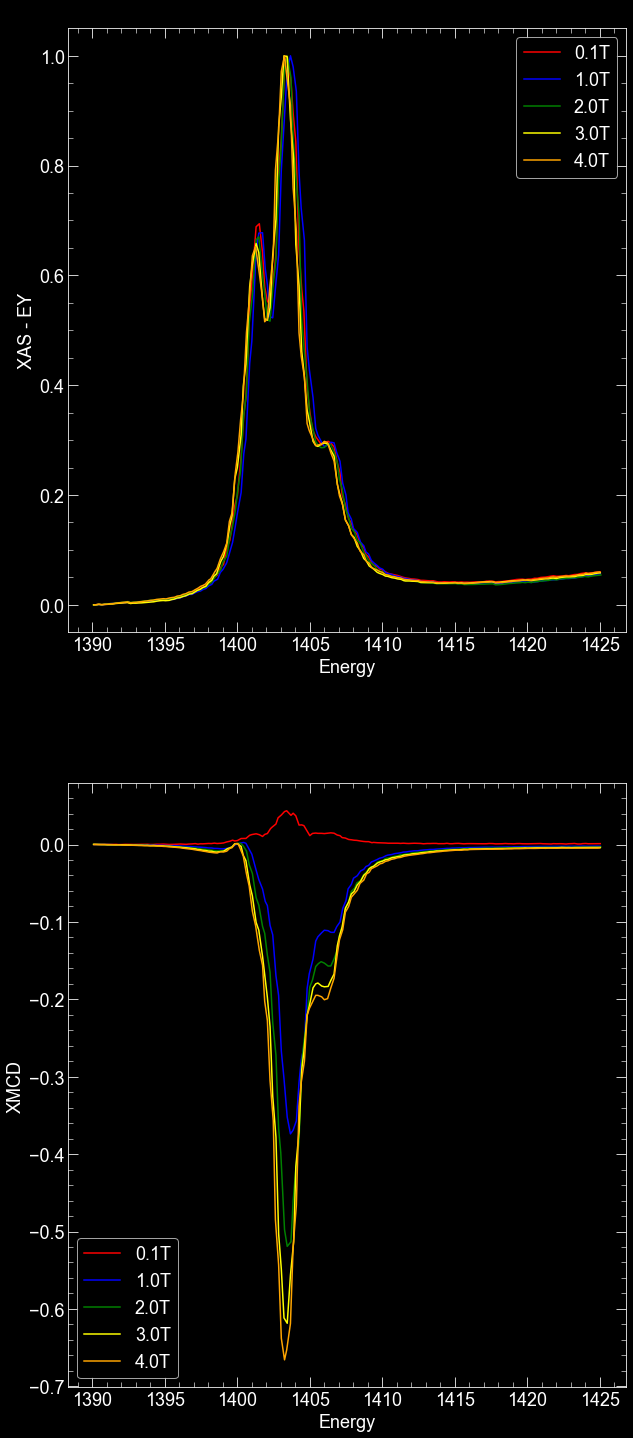

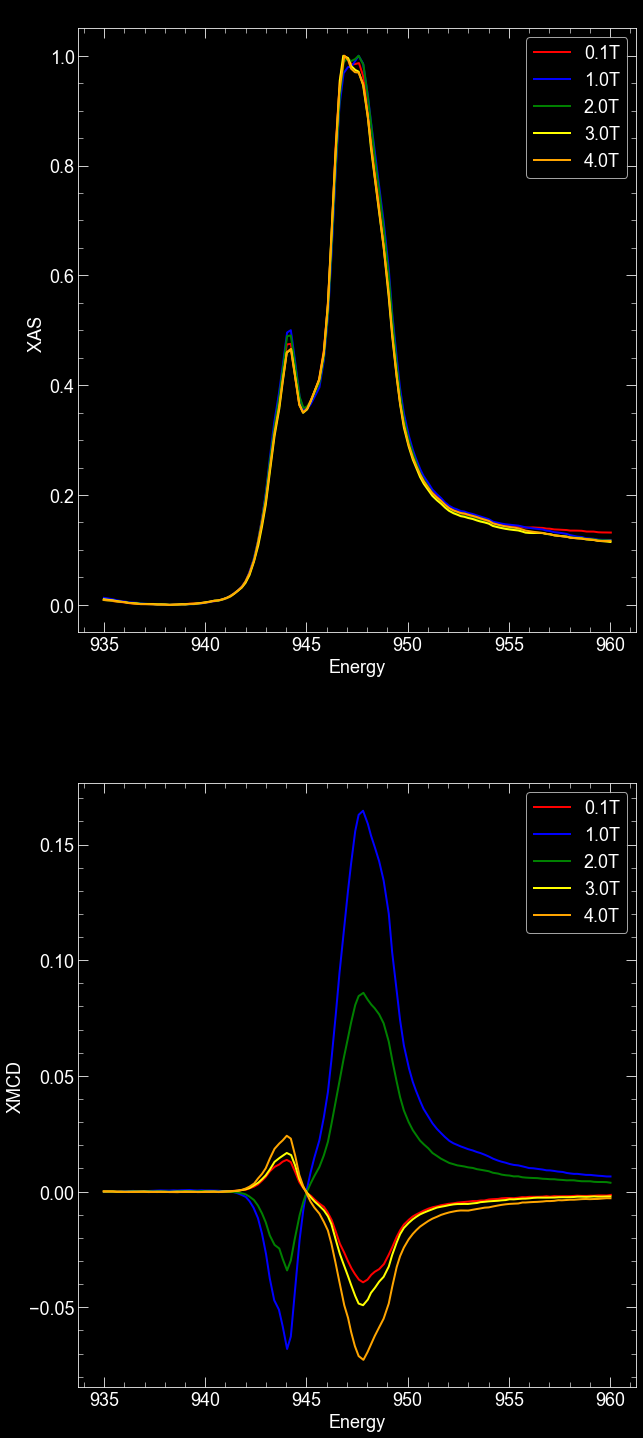

In [12]:


fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(2,1,1)
ax.set_title('Er',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Er_energy[i,:],ScEr_TEYsum[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()
ax = fig.add_subplot(2,1,2)
ax.set_ylabel('XMCD')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Er_energy[i,:],ScEr_TEYxmcd[i,:],color=colors[i],label=str(field[i])+'T')
ax.legend()

    
fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(2,1,1)
ax.set_title('Pr',color='k')
ax.set_ylabel('XAS ')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],ScPr_TEYsum[i,:],linewidth=2, linestyle='-',color=colors[i],label=str(field[i])+'T')
ax.legend()
ax = fig.add_subplot(2,1,2)
ax.set_ylabel('XMCD')
ax.set_xlabel('Energy')
for i in range(len(field)):
    ax.plot(Pr_energy[i,:],ScPr_TEYxmcd[i,:],linewidth=2, linestyle='-',color=colors[i],label=str(field[i])+'T')
ax.legend()

In [13]:
#Simple XMCD height analysis
Pk_XMCD_Er = np.zeros(field.shape)
Pk_XMCD_Pr = np.zeros(field.shape)

for i in range(len(field)):
    if abs(np.nanmax(ScEr_TEYxmcd[i,:])) > abs(np.nanmin(ScEr_TEYxmcd[i,:])):
        Pk_XMCD_Er[i] = np.nanmax(ScEr_TEYxmcd[i,:])
    else:
        Pk_XMCD_Er[i] = np.nanmin(ScEr_TEYxmcd[i,:])
    
                 
for i in range(len(field)):
    if abs(np.nanmin(ScPr_TEYxmcd[i,:]))>abs(np.nanmax(ScPr_TEYxmcd[i,:])):
        Pk_XMCD_Pr[i] = np.nanmin(ScPr_TEYxmcd[i,:]) 
    else:
        Pk_XMCD_Pr[i] = np.nanmax(ScPr_TEYxmcd[i,:])

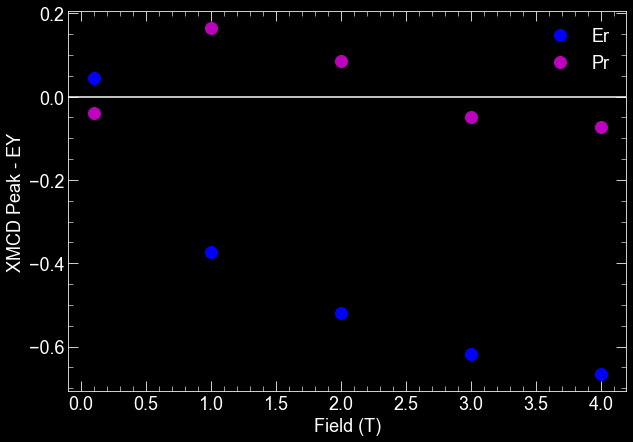

In [16]:


fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD Peak - EY')
ax.set_xlabel('Field (T)')
ax.plot(field,Pk_XMCD_Er,'bo', label='Er',markersize=12)
ax.plot(field,Pk_XMCD_Pr,'mo',label='Pr',markersize=12)
#ax.plot(field[:13],Pk_XMCD_Er[:13],'bo', label='Er',markersize=12)
#ax.plot(field[:13],Pk_XMCD_Pr[:13],'mo',label='Pr',markersize=12)
#ax.plot(field[12:],Pk_XMCD_Er[12:],'go', label='Er',markersize=12)
#ax.plot(field[12:],Pk_XMCD_Pr[12:],'wo',label='Pr',markersize=12)
ax.axhline(0,color='w')
ax.legend(frameon=False)


In [58]:
#for all three directions
field_100 = np.array([0.1,1,2,3,4])   #m4 and M5 edges
Pk_XMCD_Er_100=[-3.84624894e-04, -3.73827085e-01, -5.19166316e-01, -6.18548153e-01,
       -6.65782820e-01]
Pk_XMCD_Pr_100=[-0.03919603,  0.16458928, 0.08590154, -0.04909007, -0.07269929]


field_110 =  np.arange(0,5,.5)  
Pk_XMCD_Er_110=[-0.06879348, -0.23322694, -0.36589054, -0.46110892, -0.52840334,
       -0.57905163, -0.61949031, -0.64628509, -0.67383275, -0.69609997]
Pk_XMCD_Pr_110=[0.04689544, 0.03099175, 0.01955765, 0.00429811,-0.01571424,
       -0.0353759 , -0.05818153, -0.08028985, -0.09575876, -0.11090152]

field_111 =  np.array([0.1,0.5,1,1.5,2,3,4,5]) 
Pk_XMCD_Er_111=[2.35092732e-01,-2.97925768e-01, -5.11103670e-01, -5.99571622e-01,
       -6.60525587e-01, -7.29428837e-01, -7.80496312e-01, -7.97060643e-01]
Pk_XMCD_Pr_111=[-0.15457913,0.12271076, 0.14582914, 0.14724826, 0.10349362,
       0.13883834, 0.06325561, 0.02301482]

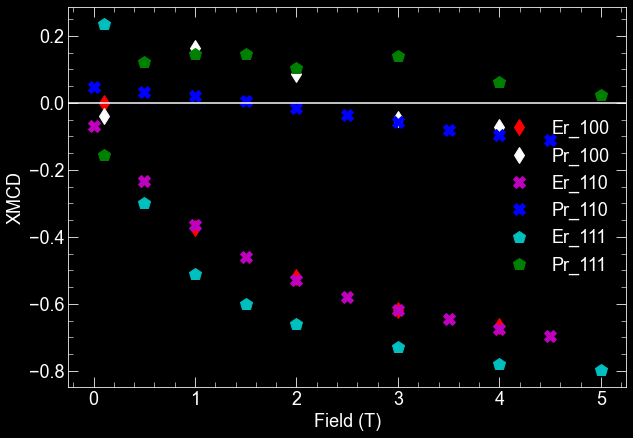

In [59]:
#plot for all three directions
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD')
ax.set_xlabel('Field (T)')
ax.plot(field_100,Pk_XMCD_Er_100, 'd',label='Er_100',color='r',markersize=12)
ax.plot(field_100,Pk_XMCD_Pr_100,'d', label='Pr_100', color='w',markersize=12)
ax.plot(field_110,Pk_XMCD_Er_110, 'X',label='Er_110', color='m',markersize=12)
ax.plot(field_110,Pk_XMCD_Pr_110,'X',label='Pr_110', color='b',markersize=12)  
ax.plot(field_111,Pk_XMCD_Er_111, 'p',label='Er_111', color='c',markersize=12)
ax.plot(field_111,Pk_XMCD_Pr_111, 'p',label='Pr_111', color='g',markersize=12)
ax.axhline(0,color='w')
ax.legend(frameon=False)